# Описание датасета о подержанных автомобилях Audi

## Предметная область
Анализ рынка подержанных автомобилей, с фокусом на марке Audi. Данные могут помочь в исследовании ценообразования и предпочтений потребителей.

## Источник данных
Датасет доступен на платформе Kaggle, что обеспечивает его надежность и актуальность.

## Характер данных
Данные являются реальными, собранными с площадок продаж автомобилей.

## Атрибуты датасета
1. **model** (строковый): Название модели автомобиля.
2. **year** (числовой): Год выпуска автомобиля.
3. **mileage** (числовой): Пробег автомобиля в километрах.
4. **price** (числовой): Цена автомобиля в евро.
5. **fuel** (строковый): Тип топлива (бензин, дизель и т.д.).
6. **color** (строковый): Цвет автомобиля.

## Описание задачи анализа
Цель анализа — исследовать влияние различных атрибутов на цену автомобилей и выявить возможные паттерны.

https://www.kaggle.com/datasets/mysarahmadbhat/audi-used-car-listings?resource=download

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('D:\\Downloads\\archive\\audi.csv')

In [6]:
df.head()       # первые строки таблицы
df.info()       # информация о типах данных и пропущенных значениях
df.describe()   # базовые статистики для числовых данных


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


1. Основные статистические показатели и визуализация распределения

Среднее значение и стандартное отклонение: Вычислите среднее значение, медиану, стандартное отклонение для каждого числового столбца, чтобы понять центральное положение и разброс данных.

In [7]:
# Вычисление среднего значения и стандартного отклонения для числовых столбцов
numeric_df = df.select_dtypes(include=[np.number])
mean_values = numeric_df.mean()
std_dev_values = numeric_df.std()

print("Средние значения:\n", mean_values)
print("\nСтандартные отклонения:\n", std_dev_values)



Средние значения:
 year           2017.100675
price         22896.685039
mileage       24827.244001
tax             126.011436
mpg              50.770022
engineSize        1.930709
dtype: float64

Стандартные отклонения:
 year              2.167494
price         11714.841888
mileage       23505.257205
tax              67.170294
mpg              12.949782
engineSize        0.602957
dtype: float64


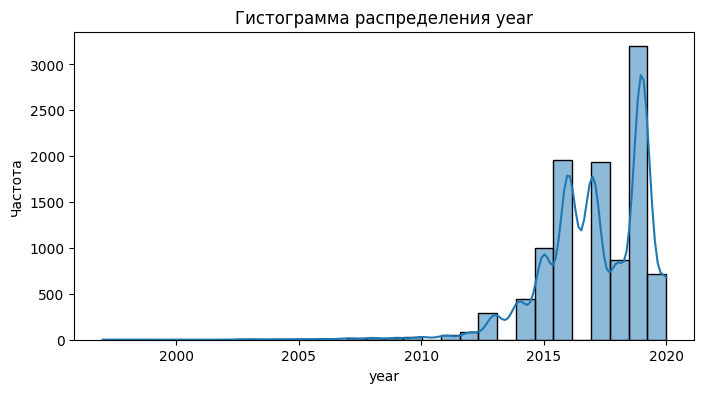

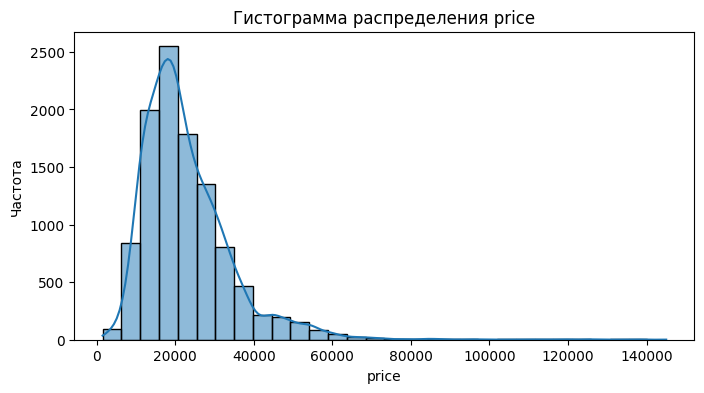

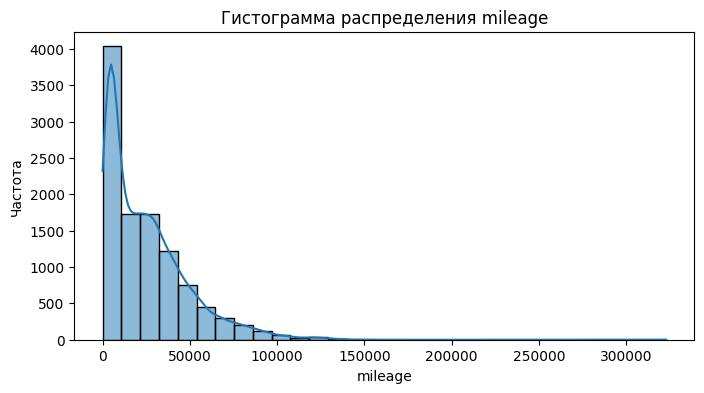

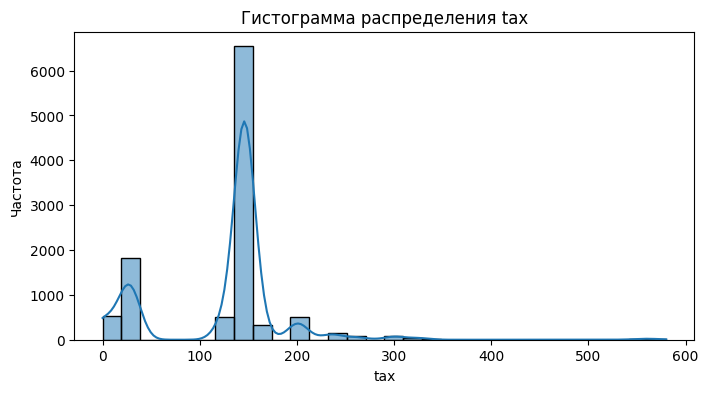

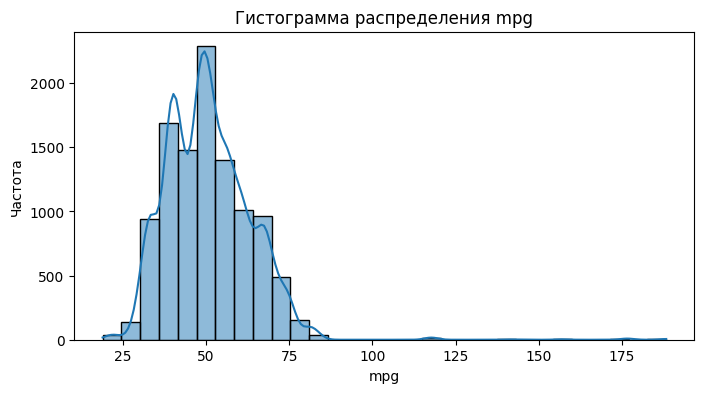

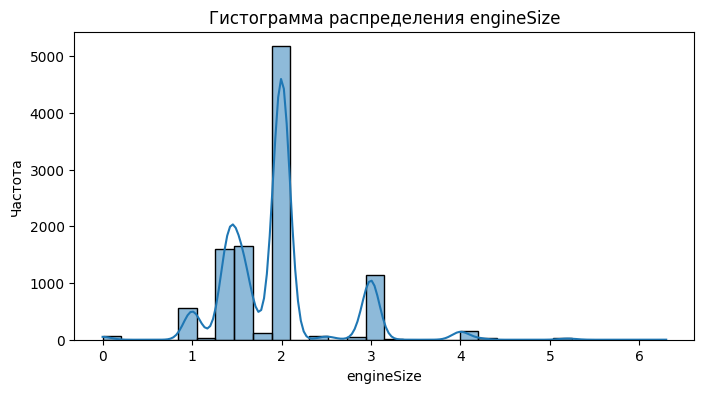

In [8]:
# Построение гистограммы для каждого числового атрибута
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

Поиск выбросов с помощью межквартильного размаха (IQR). Это дополнительно позволит понять, насколько выбросы значительны и как их обработать

In [9]:
for col in ['price', 'mileage']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Количество выбросов в {col}: {len(outliers)}')



Количество выбросов в price: 443
Количество выбросов в mileage: 324


Визуализация выбросов с использованием PairPlot: Этот график хорошо показывает выбросы в сочетании атрибутов. Он позволяет понять, как связаны параметры друг с другом и с выбросами.

Text(0.5, 1.02, 'Пары атрибутов с KDE')

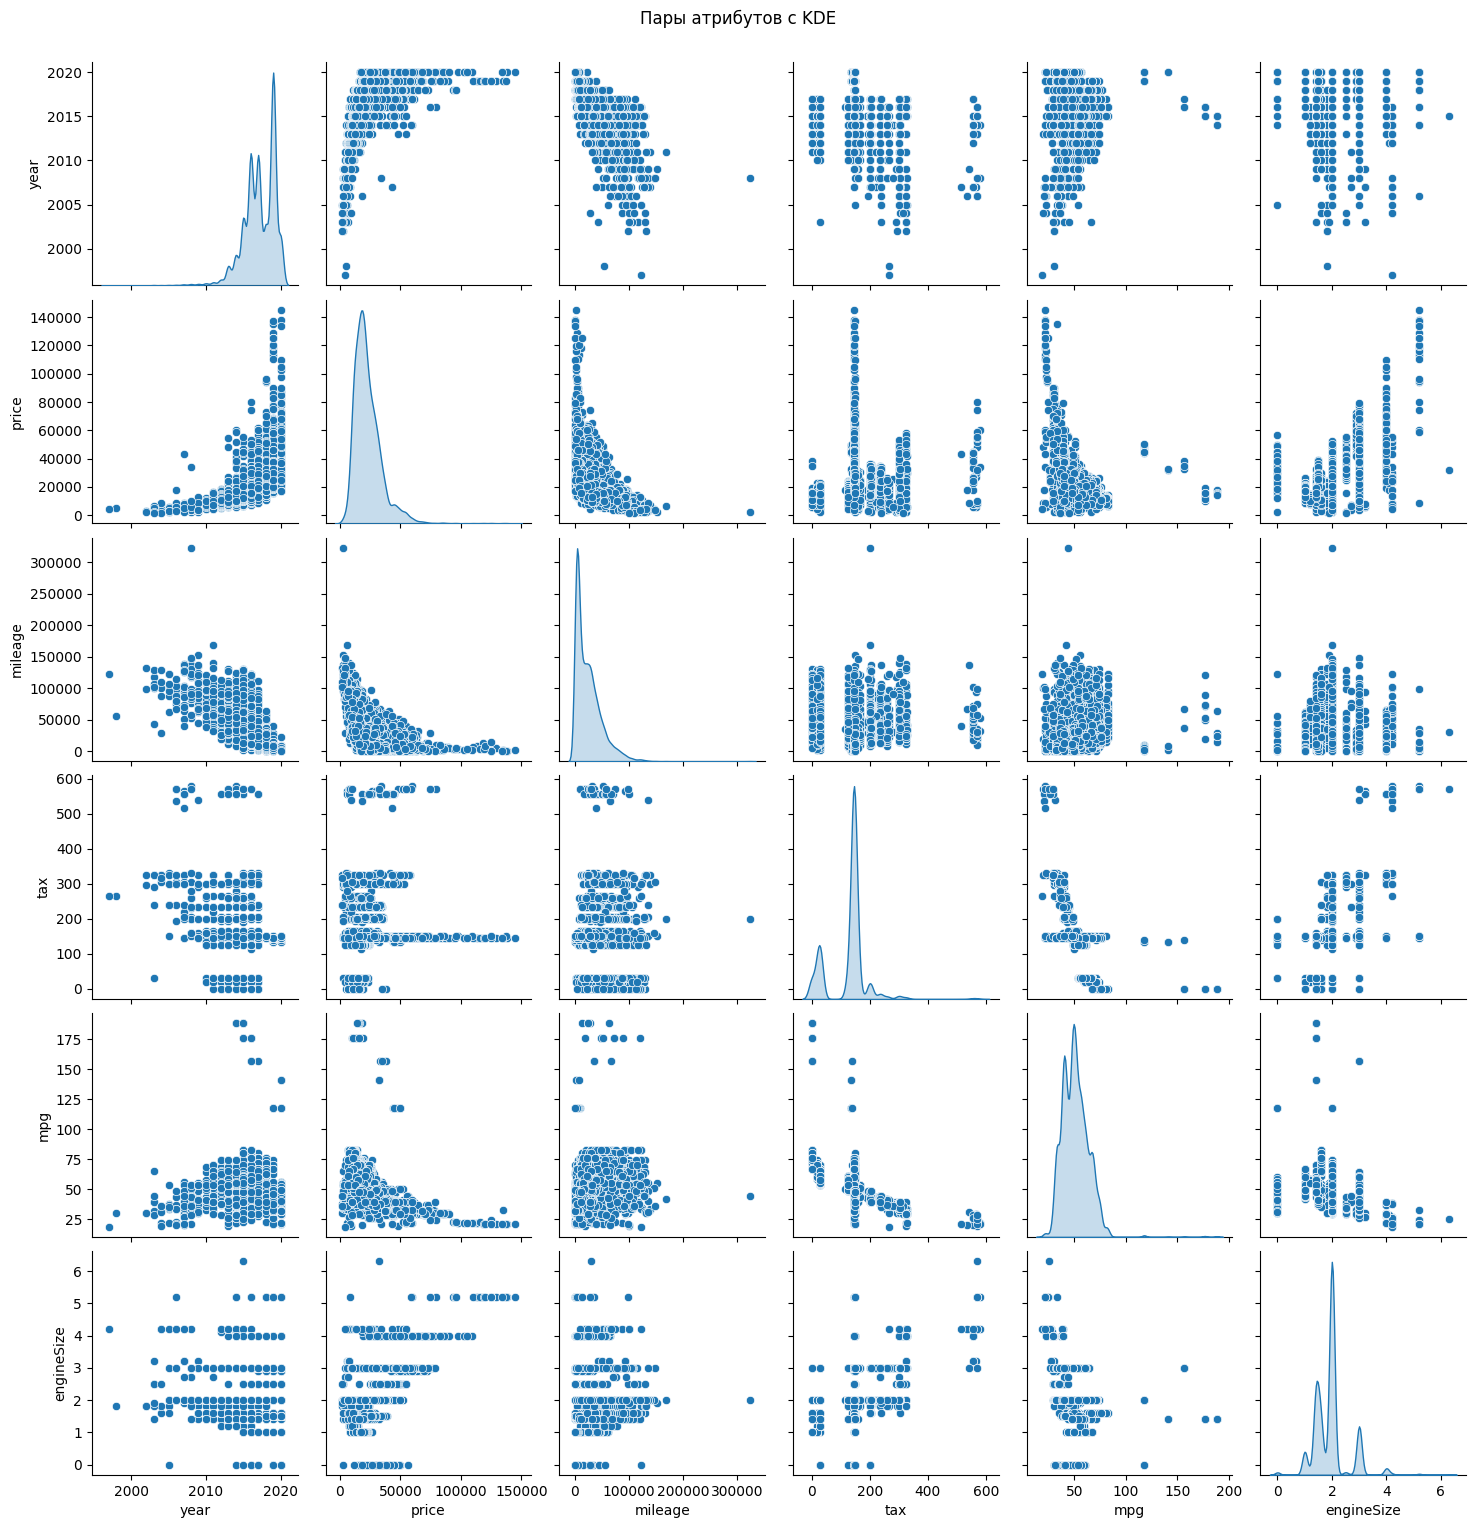

In [10]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Пары атрибутов с KDE", y=1.02)


In [11]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)


Пропущенные значения:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


Обработка пропущенных значений
Варианты обработки пропущенных значений могут включать:

Заполнение средним значением, медианой или модой.
Удаление строк или столбцов с пропущенными значениями.
Использование методов интерполяции для заполнения пропусков.

In [12]:
# Заполнение пропущенных значений средним значением
print(df.dtypes)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(df['price'].median(), inplace=True)  # либо используйте dropna()



model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


Графики распределения по категориям (например, модель или год выпуска): Это поможет проанализировать, как цены и другие атрибуты распределяются в разрезе разных категорий.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ' A1'),
  Text(1, 0, ' A6'),
  Text(2, 0, ' A4'),
  Text(3, 0, ' A3'),
  Text(4, 0, ' Q3'),
  Text(5, 0, ' Q5'),
  Text(6, 0, ' A5'),
  Text(7, 0, ' S4'),
  Text(8, 0, ' Q2'),
  Text(9, 0, ' A7'),
  Text(10, 0, ' TT'),
  Text(11, 0, ' Q7'),
  Text(12, 0, ' RS6'),
  Text(13, 0, ' RS3'),
  Text(14, 0, ' A8'),
  Text(15, 0, ' Q8'),
  Text(16, 0, ' RS4'),
  Text(17, 0, ' RS5'),
  Text(18, 0, ' R8'),
  Text(19, 0, ' SQ5'),
  Text(20, 0, ' S8'),
  Text(21, 0, ' SQ7'),
  Text(22, 0, ' S3'),
  Text(23, 0, ' S5'),
  Text(24, 0, ' A2'),
  Text(25, 0, ' RS7')])

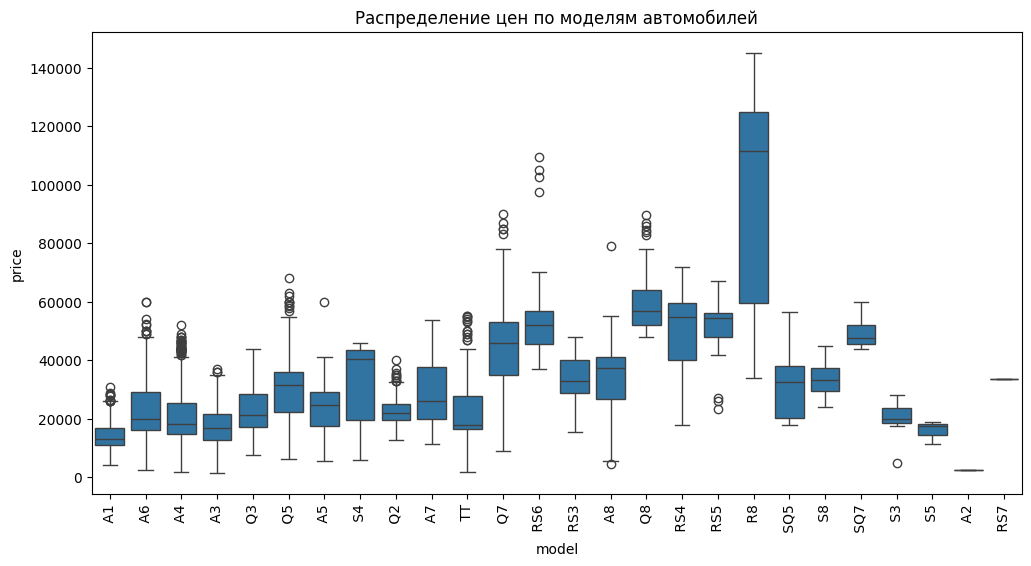

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='model', y='price', data=df)
plt.title("Распределение цен по моделям автомобилей")
plt.xticks(rotation=90)


Чтобы проанализировать, какие параметры высоко коррелируют между собой, мы используем коэффициент корреляции Пирсона. Он показывает линейную связь между числовыми атрибутами: значения, близкие к ±1, указывают на сильную корреляцию, а значения около 0 указывают на слабую или отсутствующую корреляцию.

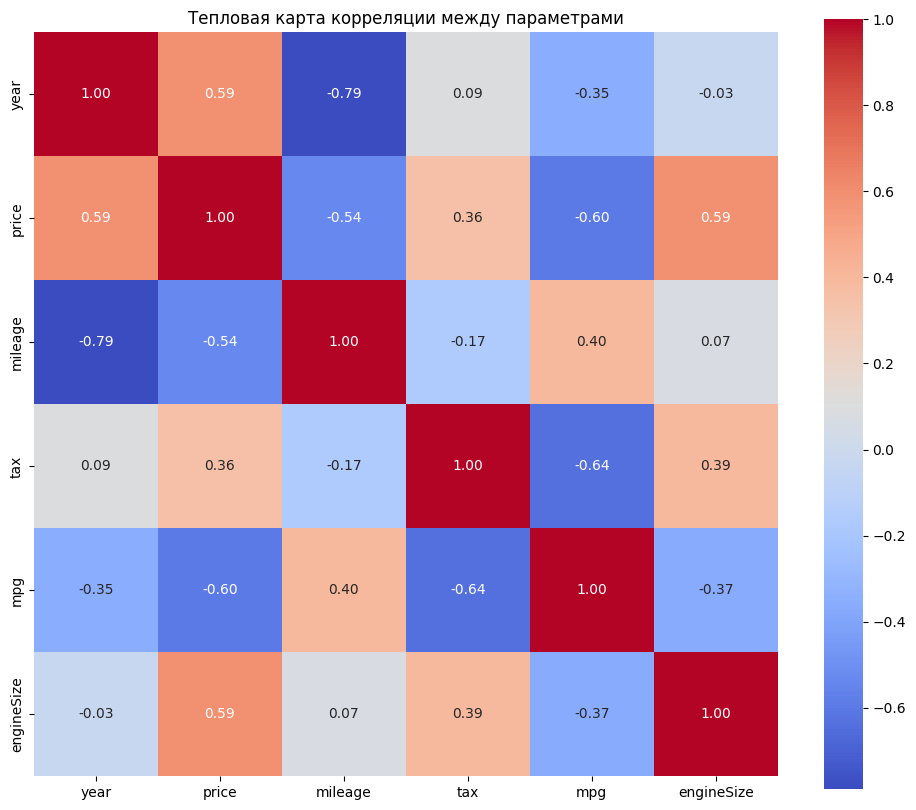

In [14]:
# Создание таблицы корреляции
correlation_matrix = numeric_df.corr()

# Визуализация корреляции с помощью тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Тепловая карта корреляции между параметрами")
plt.show()


Теперь выделим атрибуты с высокой корреляцией (например, |корреляция| > 0.7) и атрибуты, где корреляция практически отсутствует (|корреляция| < 0.1)

In [15]:
# Задаем порог корреляции для выделения значимых связей
high_corr_threshold = 0.7
high_corr_pairs = []

for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        if i != j and abs(correlation_matrix.loc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((i, j, correlation_matrix.loc[i, j]))

# Вывод таблицы высококоррелированных пар
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Attribute 1', 'Attribute 2', 'Correlation'])
print("Высококоррелированные пары атрибутов:")
display(high_corr_df)


Высококоррелированные пары атрибутов:


,Attribute 1,Attribute 2,Correlation
0,year,mileage,-0.789667
1,mileage,year,-0.789667


Для каждой найденной пары можно построить график рассеивания

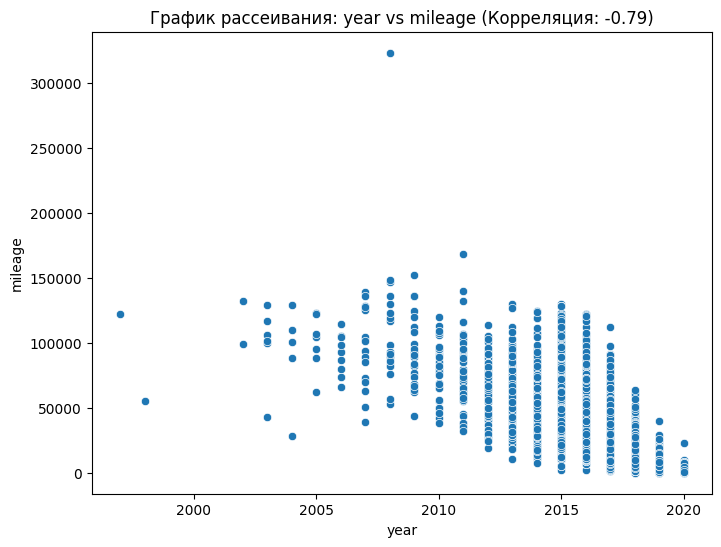

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('D:\\Downloads\\archive\\audi.csv')

# Выбираем только числовые столбцы
numeric_data = data.select_dtypes(include=[np.number])

# Шаг 1: Вычисление корреляционной матрицы для числовых данных
correlation_matrix = numeric_data.corr()

# Шаг 2: Извлечение пар атрибутов с высокой корреляцией (например, выше 0.7 или ниже -0.7)
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > 0.7) & (high_corr_pairs['Attribute 1'] != high_corr_pairs['Attribute 2'])]

# Удаление дубликатов (пар, представленных дважды)
high_corr_pairs['Ordered Pair'] = high_corr_pairs.apply(lambda x: tuple(sorted([x['Attribute 1'], x['Attribute 2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Ordered Pair']).drop(columns=['Ordered Pair'])

# Шаг 3: Построение графиков рассеивания для каждой высококоррелированной пары
for index, row in high_corr_pairs.iterrows():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=row['Attribute 1'], y=row['Attribute 2'])
    plt.title(f"График рассеивания: {row['Attribute 1']} vs {row['Attribute 2']} (Корреляция: {row['Correlation']:.2f})")
    plt.xlabel(row['Attribute 1'])
    plt.ylabel(row['Attribute 2'])
    plt.show()


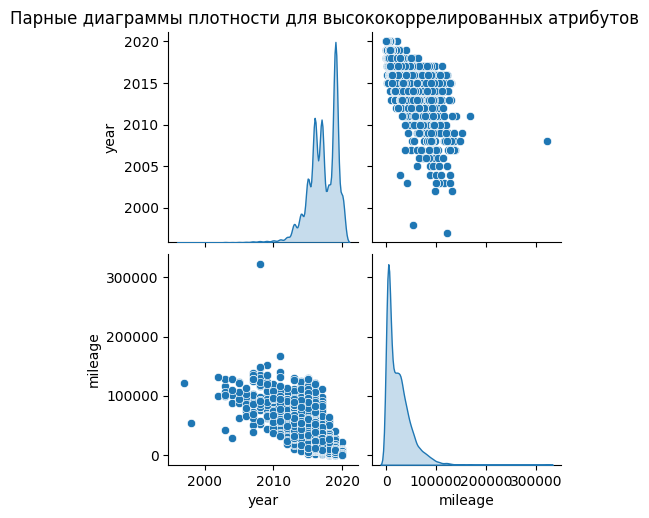

In [17]:
sns.pairplot(numeric_df, vars=high_corr_df['Attribute 1'].unique(), diag_kind='kde')
plt.suptitle("Парные диаграммы плотности для высококоррелированных атрибутов", y=1.02)
plt.show()

Чтобы глубже понять взаимосвязи, создадим матрицу графиков рассеивания (scatter matrix), которая позволяет визуально оценить зависимость между парами переменных.


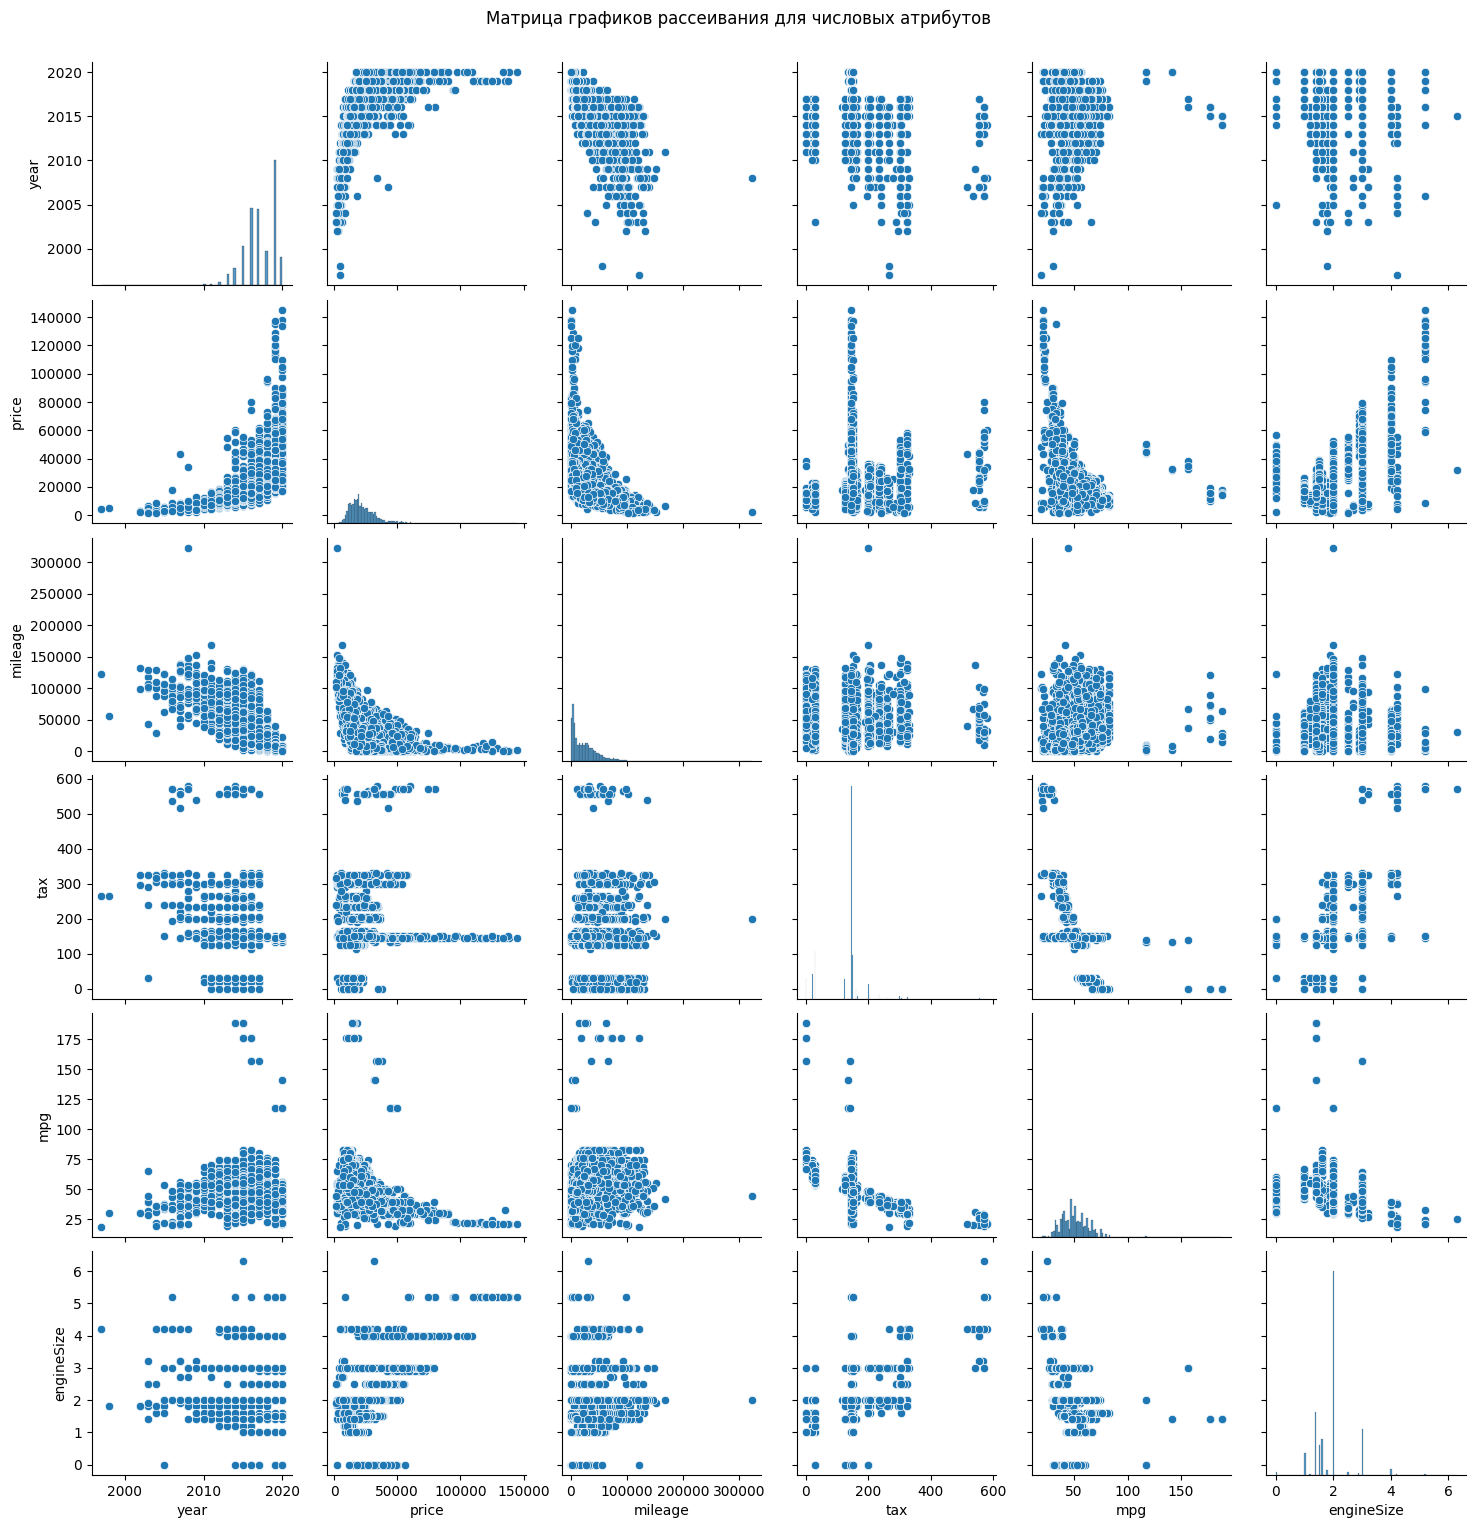

In [18]:
# Построение матрицы графиков рассеивания
import seaborn as sns
sns.pairplot(numeric_df)
plt.suptitle("Матрица графиков рассеивания для числовых атрибутов", y=1.02)
plt.show()

Диаграммы Бокса для выявления выбросов по каждому числовому атрибуту

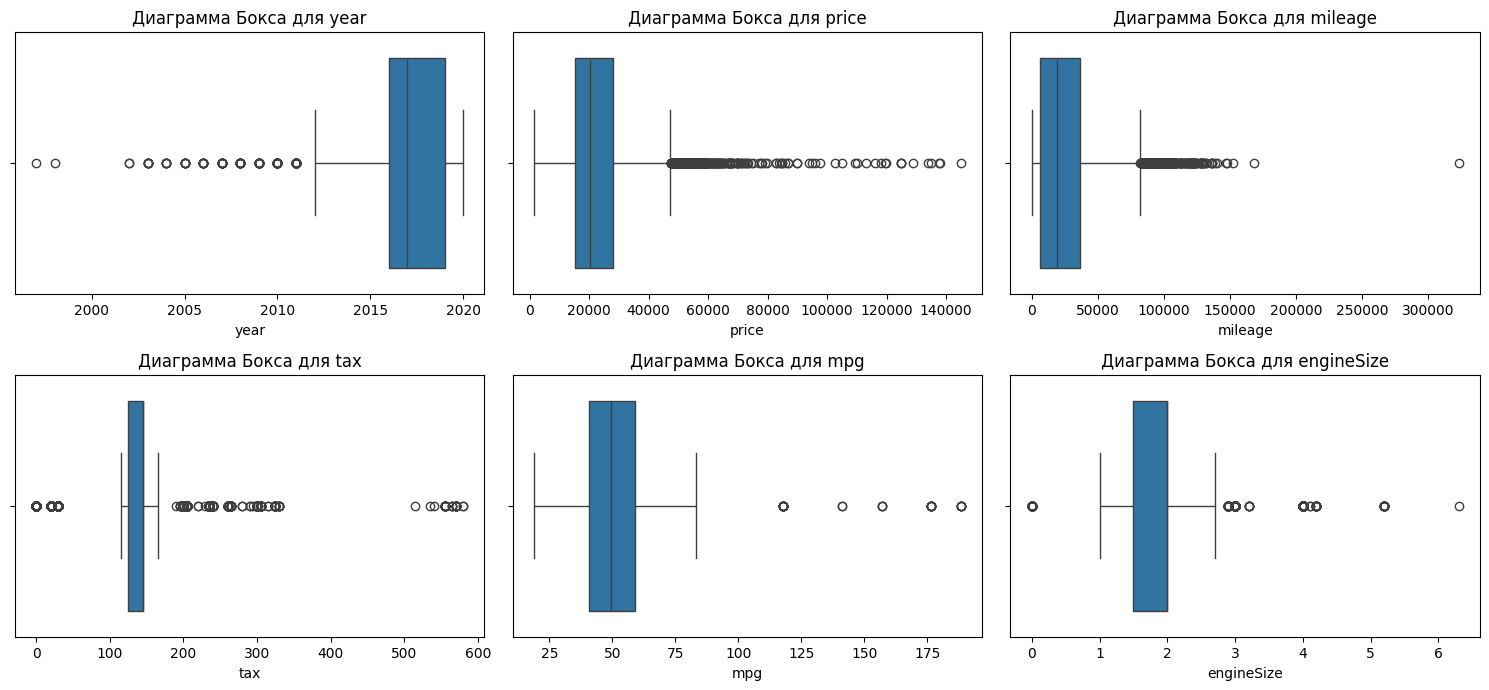

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=numeric_df[col])
    plt.title(f"Диаграмма Бокса для {col}")
plt.tight_layout()
plt.show()

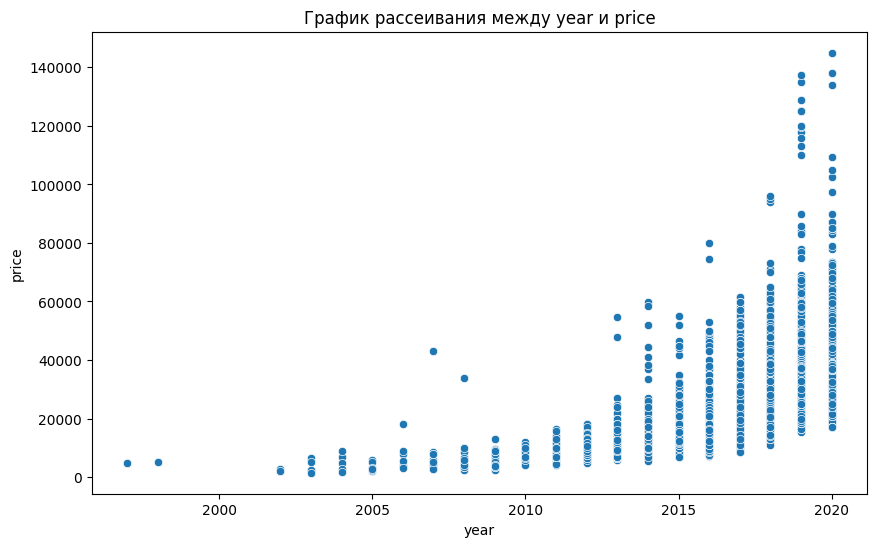

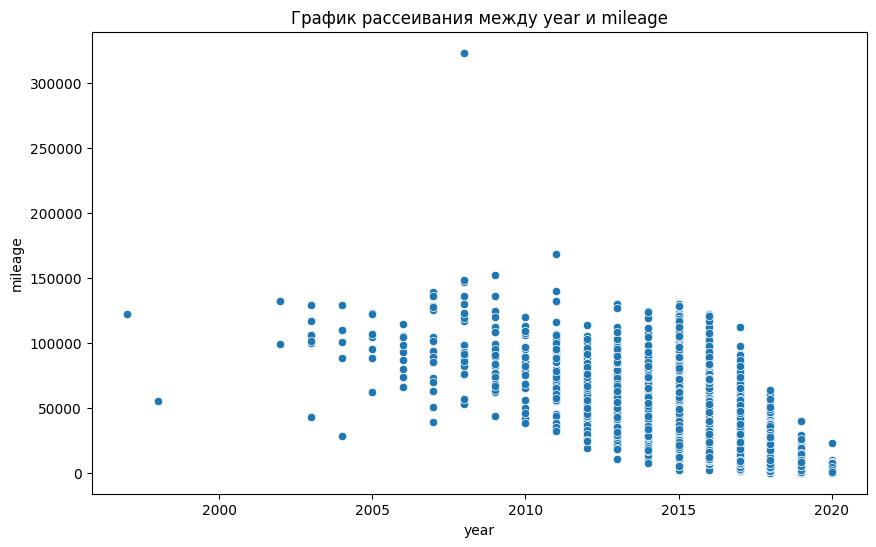

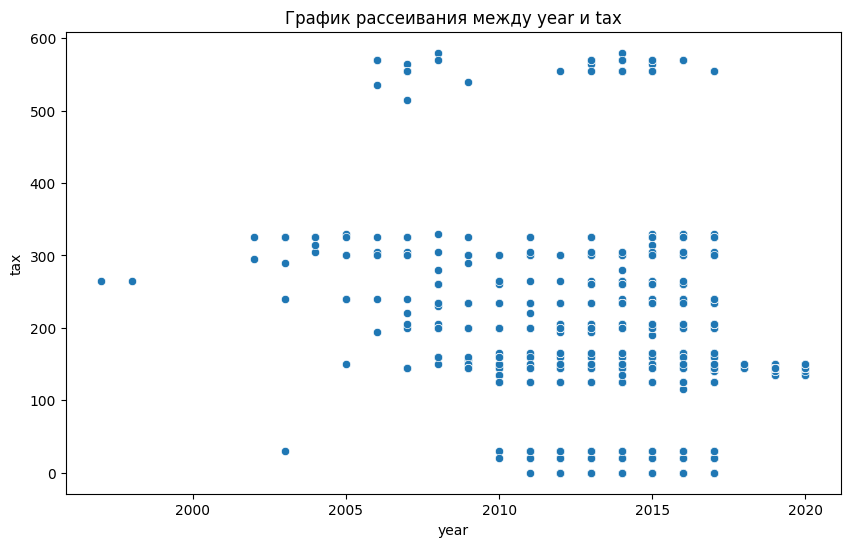

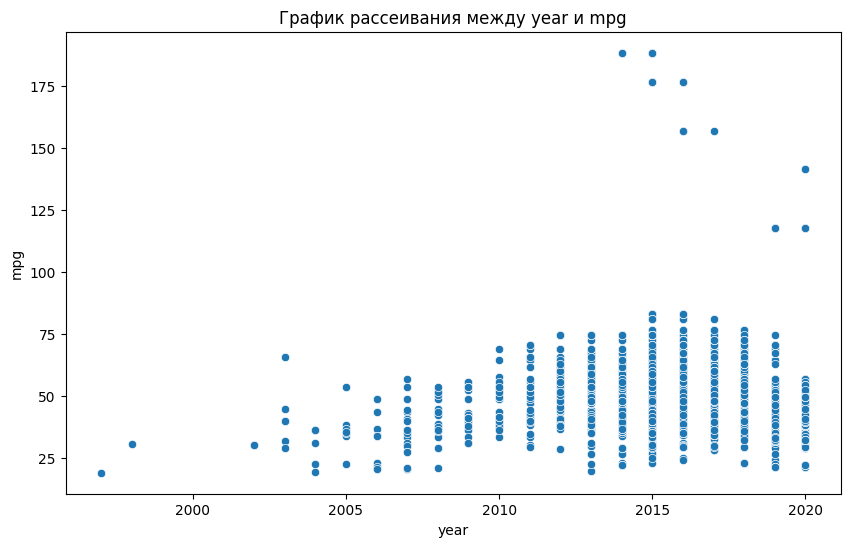

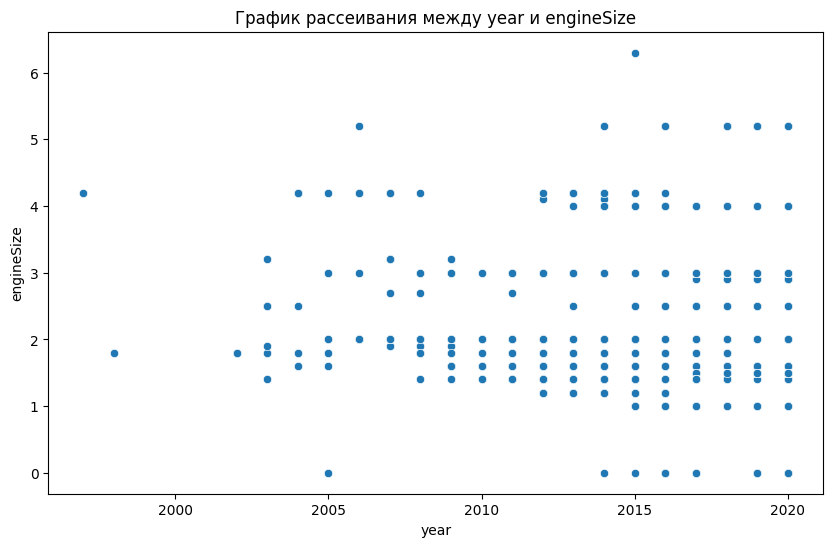

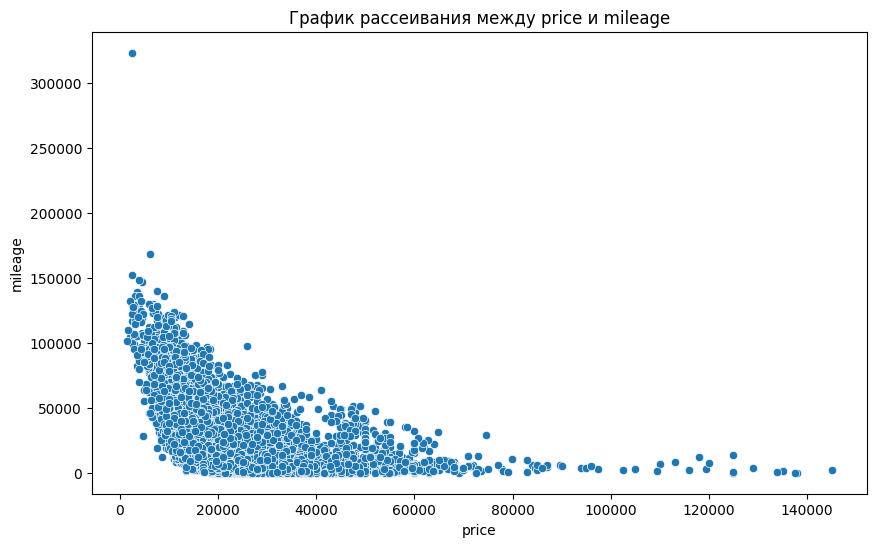

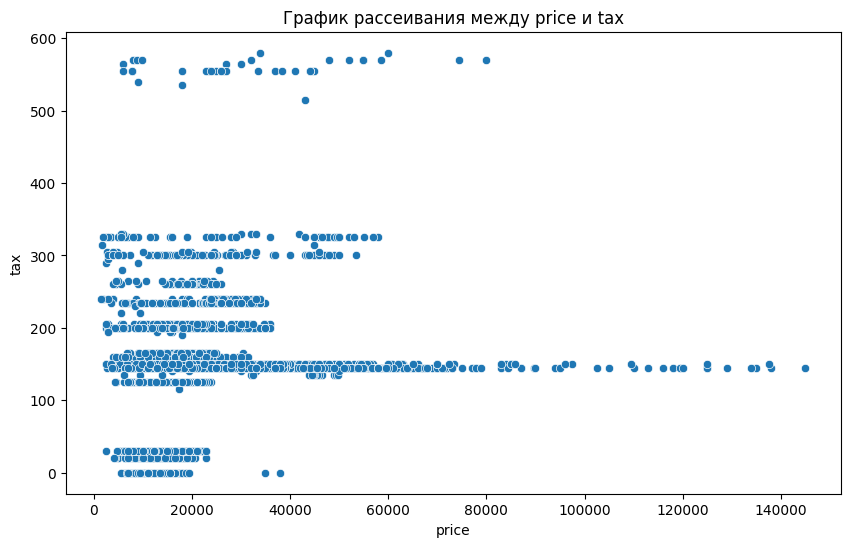

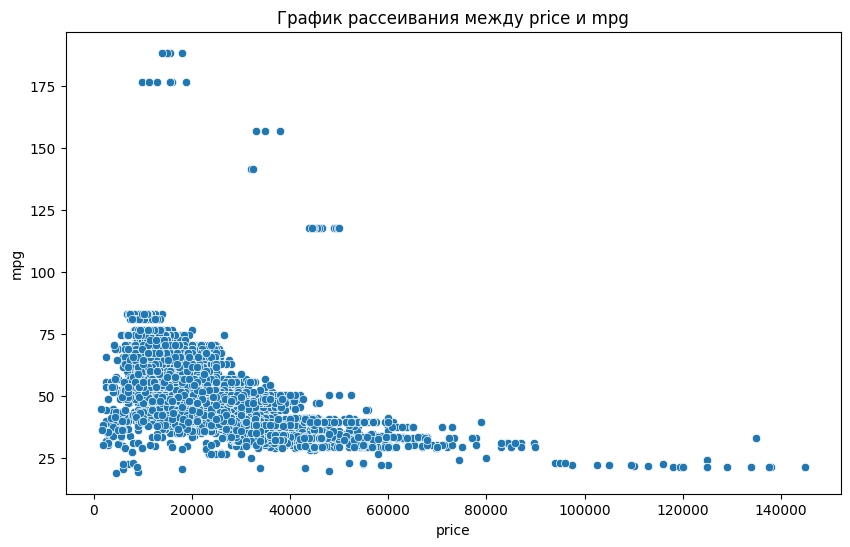

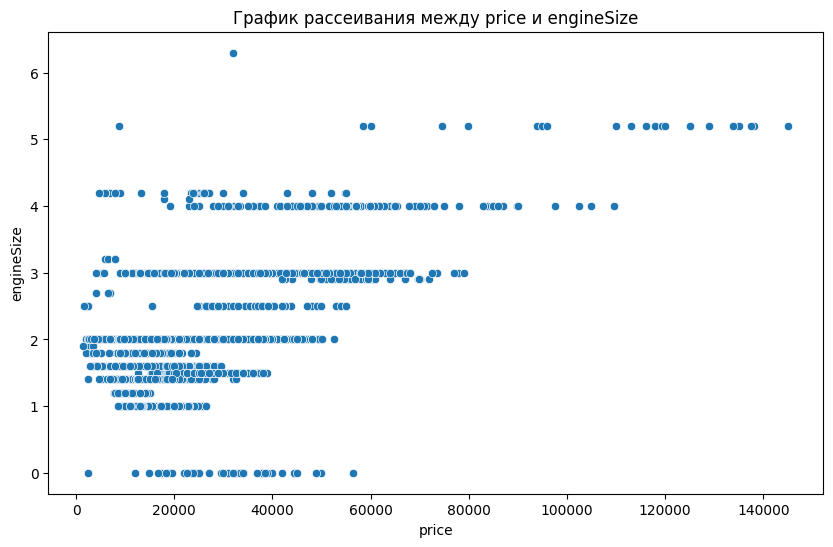

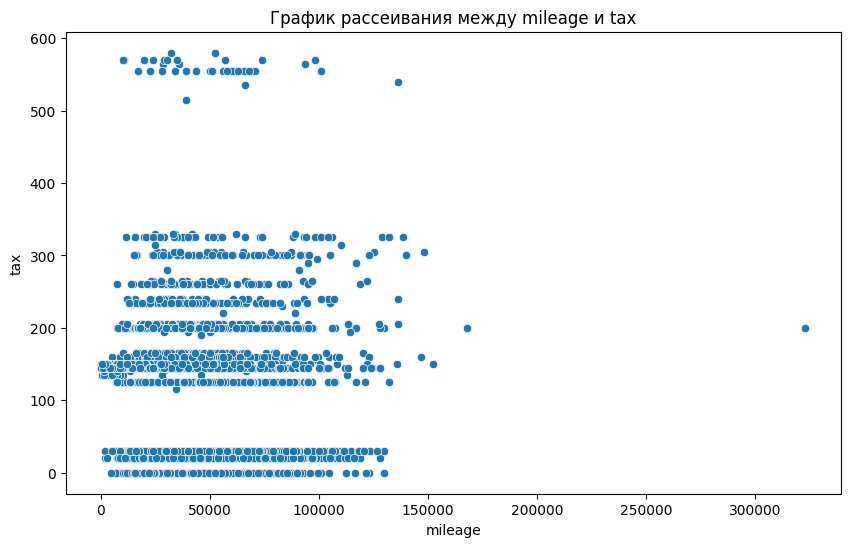

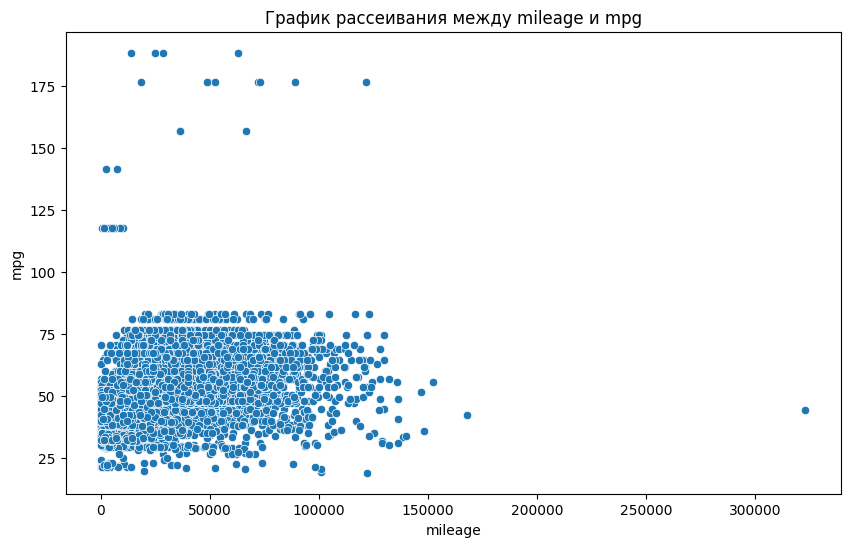

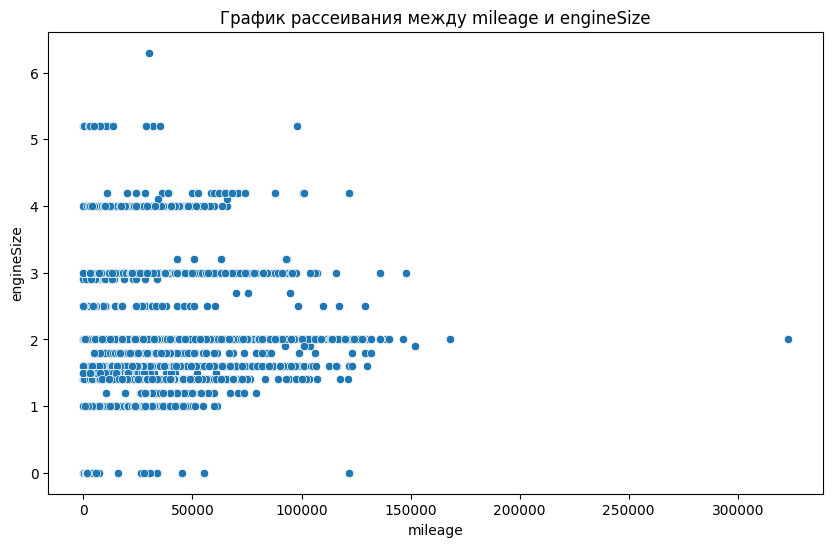

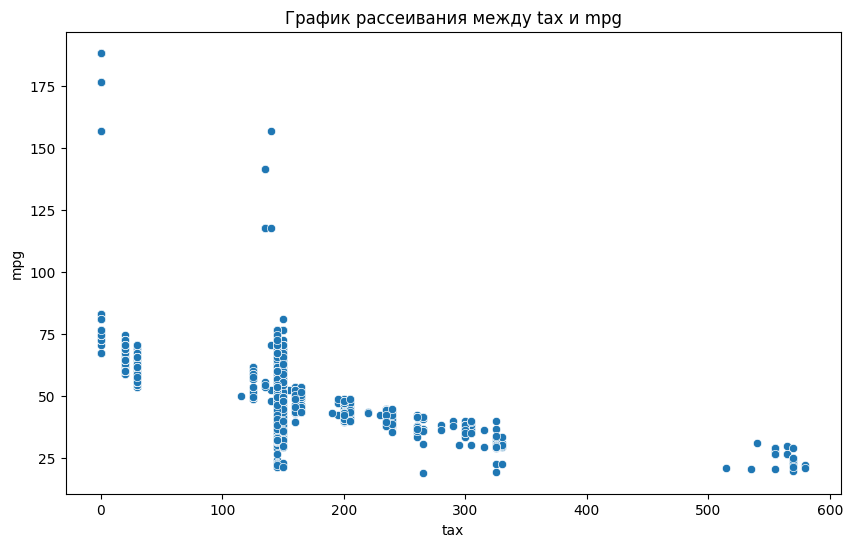

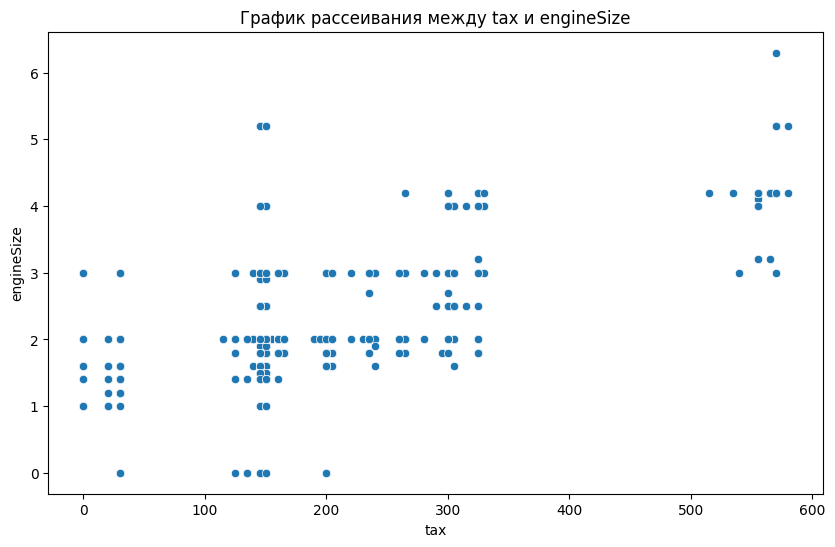

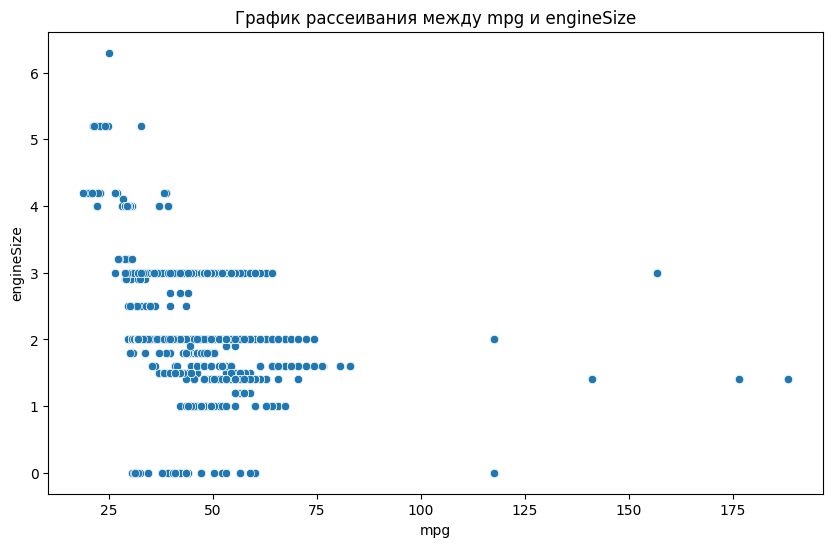

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('D:\\Downloads\\archive\\audi.csv')

# Определение всех числовых атрибутов
num_cols = data.select_dtypes(include=[np.number]).columns

# Построение графиков рассеивания между всеми парами числовых атрибутов
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=num_cols[i], y=num_cols[j])
        plt.title(f'График рассеивания между {num_cols[i]} и {num_cols[j]}')
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.show()


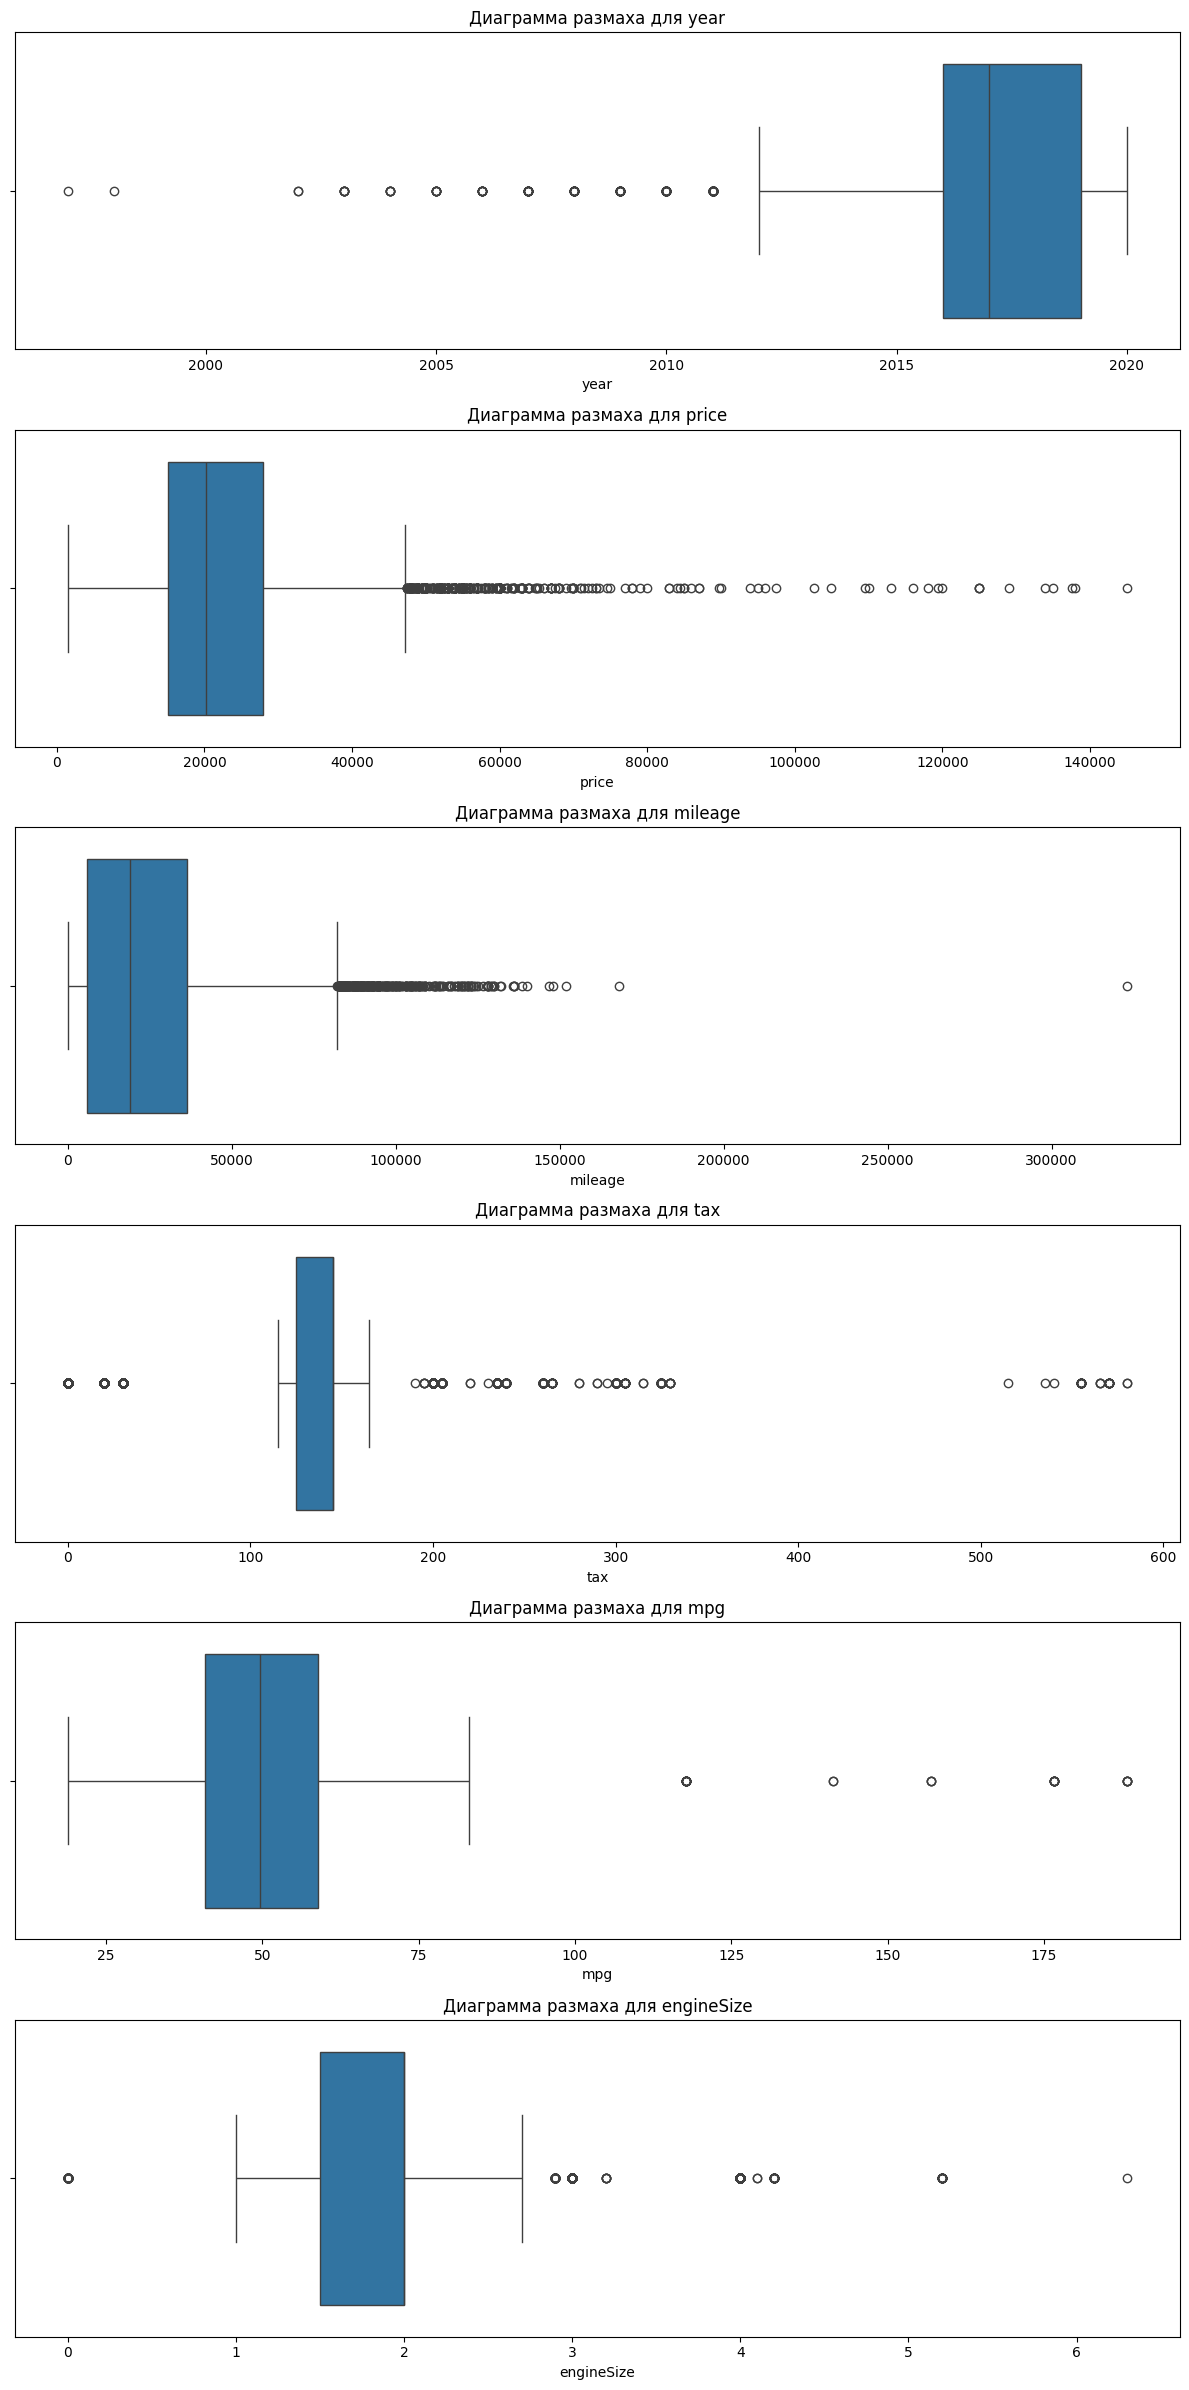

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение диаграмм размаха для всех числовых атрибутов
num_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, len(num_cols) * 4))  # Установка общего размера фигуры для всех графиков
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)  # Создание подграфиков
    sns.boxplot(data=data, x=col)
    plt.title(f'Диаграмма размаха для {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


ЛАБОРАТОРНАЯ РАБОТА №2

№1

In [22]:
# Функция для классификации цены
def categorize_price(price):
    if price < 20000:
        return 'low'
    elif 20000 <= price < 40000:
        return 'medium'
    else:
        return 'high'

# Применяем функцию к столбцу 'price' и создаем новый столбец 'price_category'
df['price_category'] = df['price'].apply(categorize_price)

# Выводим первые несколько строк, чтобы убедиться в корректности
print(df[['price', 'price_category']].head())

# Проверка количества записей в каждой категории
print("Распределение по категориям цен:")
print(df['price_category'].value_counts())


   price price_category
0  12500            low
1  16500            low
2  11000            low
3  16800            low
4  17300            low
Распределение по категориям цен:
price_category
low       5261
medium    4671
high       736
Name: count, dtype: int64


№2

Удаление дубликатов
Чтобы исключить повторяющиеся записи, можно использовать метод drop_duplicates.

In [23]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)
print("Количество записей после удаления дубликатов:", len(df))


Количество записей после удаления дубликатов: 10565


Обработка пропущенных значений
Для обработки пропущенных значений можно заполнить их медианой или средним значением, либо удалить строки с пропусками, если их немного.

In [24]:
# Проверка пропущенных значений
print("Пропущенные значения в каждом столбце:")
print(df.isnull().sum())

# Заполнение пропущенных значений в числовых столбцах медианой
df.fillna(df.median(numeric_only=True), inplace=True)

# Если есть категориальные столбцы с пропусками, можно заполнить их модой
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


Пропущенные значения в каждом столбце:
model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax               0
mpg               0
engineSize        0
price_category    0
dtype: int64


Удаление выбросов
Чтобы удалить выбросы, можно использовать метод межквартильного размаха (IQR). Этот метод подходит для числовых данных и помогает удалить записи, которые выходят за рамки нормального диапазона.

In [25]:
# Удаление выбросов методом межквартильного размаха (IQR) для числовых столбцов
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Оставляем только те записи, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df = df[~((df.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | 
          (df.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Количество записей после удаления выбросов:", len(df))


Количество записей после удаления выбросов: 6135


Поиск и исправление аномалий или "кривых" данных
Проверим данные на наличие необычных значений, которые могут свидетельствовать о вводе ошибок или аномалиях. Например, отрицательные значения в пробеге (mileage) или цене (price) могут быть ошибочными.

In [26]:
# Проверка на отрицательные значения в числовых столбцах
for column in ['price', 'mileage']:  # укажите здесь нужные числовые столбцы
    if (df[column] < 0).any():
        print(f"Есть отрицательные значения в столбце '{column}'")
        # Заменяем отрицательные значения на NaN и заполняем медианой
        df[column] = df[column].apply(lambda x: x if x >= 0 else None)
        df[column].fillna(df[column].median(), inplace=True)



Проверка данных после очистки
Чтобы удостовериться, что данные «причесаны», полезно еще раз проверить, что дубликаты, выбросы и пропуски были обработаны.

In [27]:
# Проверка пропусков, выбросов и дубликатов после очистки
print("Пропущенные значения после очистки:")
print(df.isnull().sum())

print("Количество записей после полной очистки:", len(df))


Пропущенные значения после очистки:
model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax               0
mpg               0
engineSize        0
price_category    0
dtype: int64
Количество записей после полной очистки: 6135


№3


Для визуализации данных и выявления потенциальных кластеров можно использовать графики рассеяния (plt.scatter), сравнивая пары переменных. Например, для анализа цен на подержанные автомобили можно использовать такие переменные, как price и mileage, или year и price, чтобы увидеть закономерности и выделить группы.

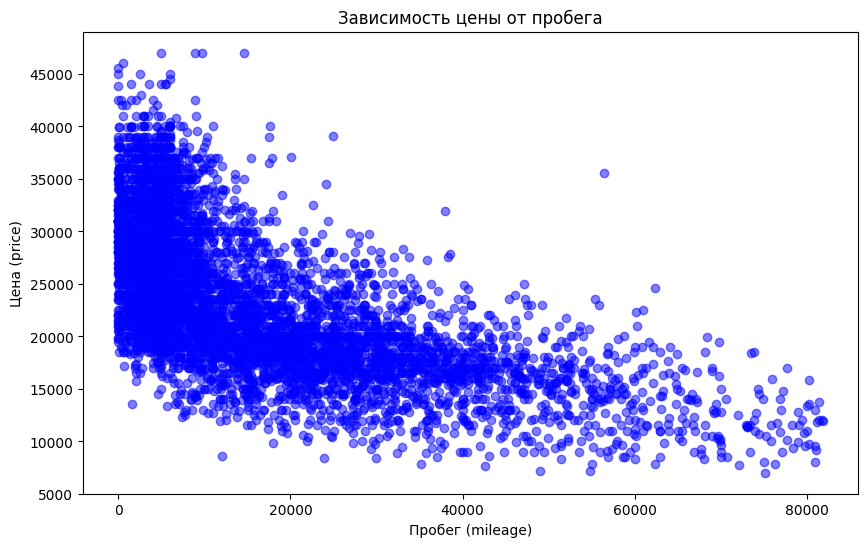

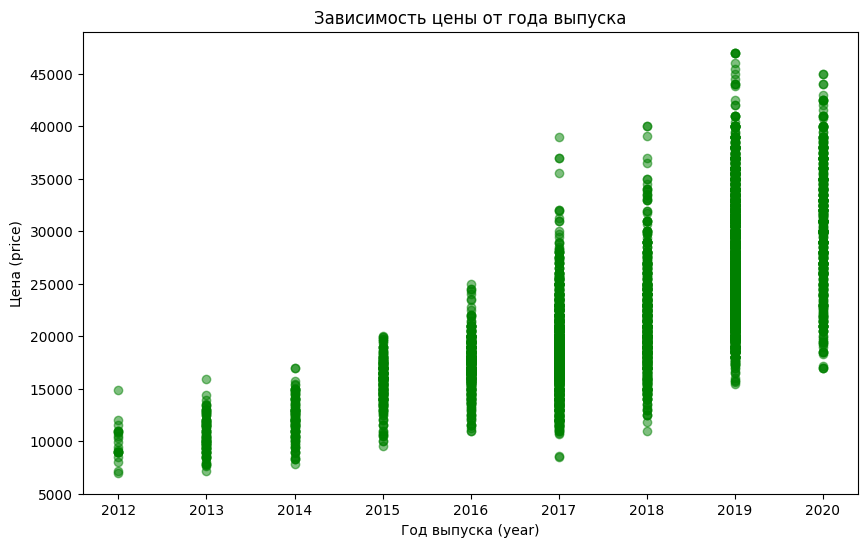

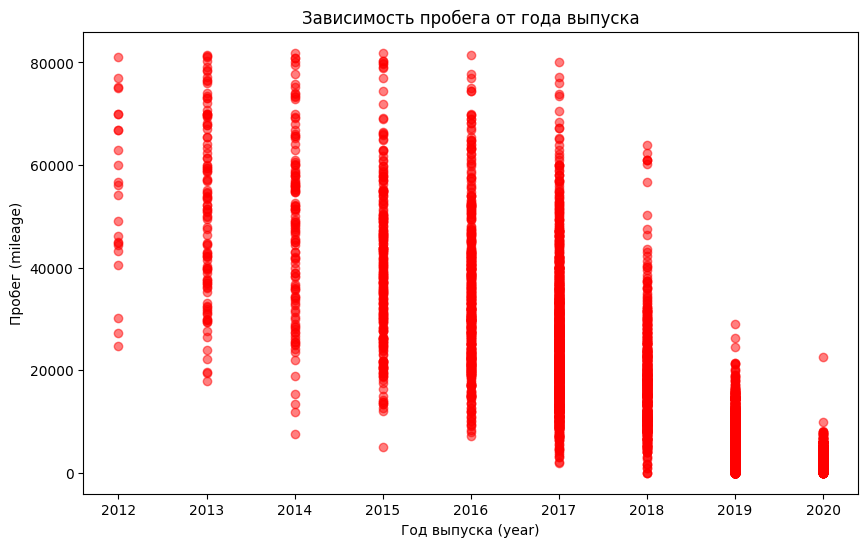

In [28]:
import matplotlib.pyplot as plt

# График зависимости цены от пробега
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.5, c='blue')
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег (mileage)')
plt.ylabel('Цена (price)')
plt.show()

# График зависимости цены от года выпуска
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5, c='green')
plt.title('Зависимость цены от года выпуска')
plt.xlabel('Год выпуска (year)')
plt.ylabel('Цена (price)')
plt.show()

# График зависимости пробега от года выпуска
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['mileage'], alpha=0.5, c='red')
plt.title('Зависимость пробега от года выпуска')
plt.xlabel('Год выпуска (year)')
plt.ylabel('Пробег (mileage)')
plt.show()


Описание видимых кластеров

Зависимость цены от пробега: На этом графике можно увидеть, что автомобили с низким пробегом обычно имеют более высокую цену. Здесь часто выделяются несколько кластеров: автомобили с низким пробегом и высокой ценой, и автомобили с высоким пробегом и низкой ценой.

Зависимость цены от года выпуска: На этом графике можно увидеть, что более новые автомобили имеют более высокую цену. Могут быть кластеры старых автомобилей с низкой ценой и новые автомобили с высокой ценой.

Зависимость пробега от года выпуска: Здесь могут выделяться группы автомобилей с низким пробегом и новым годом выпуска, а также старые автомобили с высоким пробегом.

№4

Для кластеризации в этом случае будем использовать метод KMeans из библиотеки sklearn. Перед тем как применить кластеризацию, важно выбрать и нормализовать нужные признаки, такие как price, mileage, и year. Нормализация улучшает результаты кластеризации, особенно если признаки находятся в разных единицах измерения.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Выбор признаков для кластеризации
features = df[['price', 'mileage', 'year']]

# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Выбор числа кластеров с помощью метода "локтя"
Метод локтя позволяет определить оптимальное количество кластеров, при котором кривая зависимости суммы квадратов расстояний внутри кластеров (inertia) от числа кластеров начинает выравниваться.

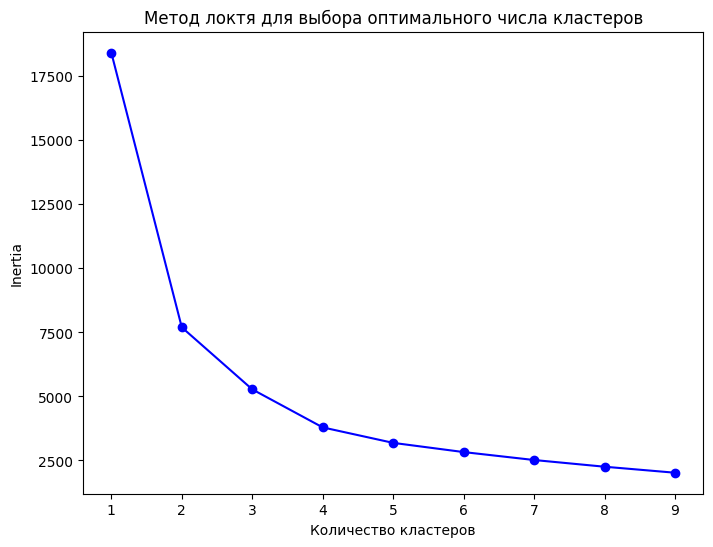

In [30]:
# Выбор количества кластеров с использованием метода локтя
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора оптимального числа кластеров')
plt.show()


После выбора оптимального количества кластеров применим алгоритм KMeans.

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Применение KMeans с выбранным количеством кластеров
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Использование .loc для изменения значений в DataFrame
df.loc[:, 'cluster'] = kmeans.fit_predict(scaled_features)



Визуализация результатов
Теперь, когда кластеры определены, визуализируем их на графиках рассеяния.

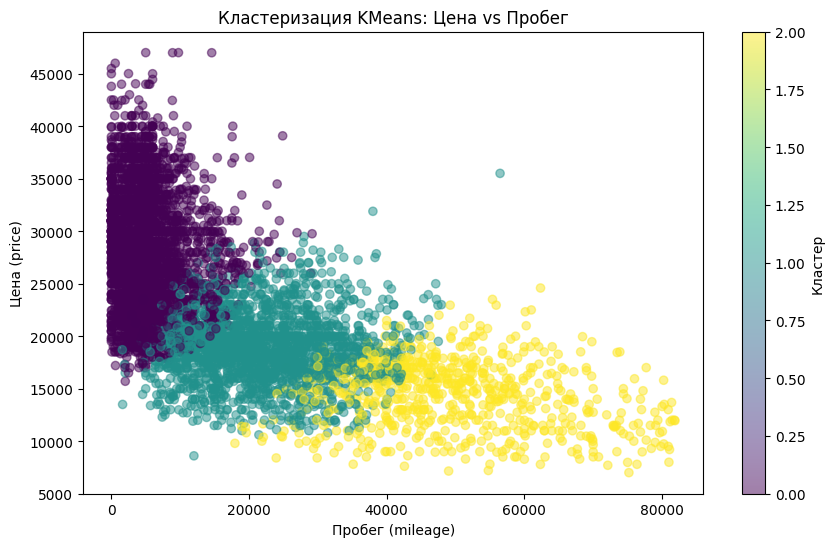

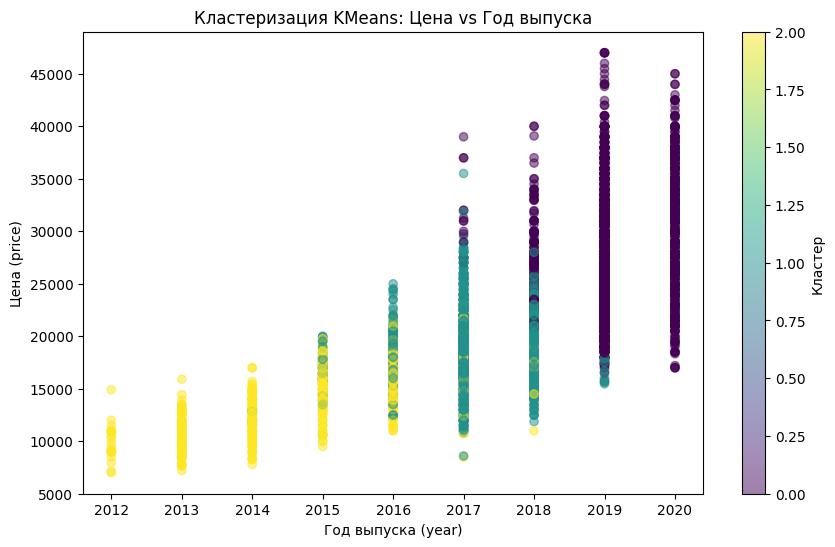

In [32]:
# График цены и пробега по кластерам
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Кластеризация KMeans: Цена vs Пробег')
plt.xlabel('Пробег (mileage)')
plt.ylabel('Цена (price)')
plt.colorbar(label='Кластер')
plt.show()

# График цены и года выпуска по кластерам
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Кластеризация KMeans: Цена vs Год выпуска')
plt.xlabel('Год выпуска (year)')
plt.ylabel('Цена (price)')
plt.colorbar(label='Кластер')
plt.show()


Выводы
Добавление нового атрибута: В ходе работы с датасетом был добавлен новый атрибут, который классифицирует автомобили по трем уровням: "low", "medium" и "high". Этот атрибут помогает лучше понять распределение данных и улучшить анализ по ценовым сегментам.

Причесывание датасета: Были выполнены следующие операции по очистке данных:

Удаление выбросов: применен метод межквартильного размаха (IQR), который помогает устранить аномальные значения и делает данные более устойчивыми к экстремальным значениям.
Обработка пропущенных значений: пропущенные данные были либо удалены, либо заменены на соответствующие медианные значения, что позволяет минимизировать потери информации.
Удаление дублирующихся строк: все дублирующиеся записи были удалены, чтобы избежать искажения результатов анализа.
Анализ зависимости переменных: Построены графики зависимости различных переменных (например, цена, пробег, год выпуска) друг от друга. На основе этих графиков были выявлены различные кластеры, например, автомобили с низким пробегом и высокой ценой, а также те, которые имеют высокий пробег и низкую цену. Такие визуализации помогают лучше понять структуры в данных и выделить основные группы.

Применение метода кластеризации KMeans: Метод KMeans был успешно применен для кластеризации автомобилей по признакам: цена, пробег, год выпуска. Результаты кластеризации показали наличие трех очевидных групп, что подтверждается методом локтя (график инерции). На основе кластеров можно выделить автомобили, подходящие для разных типов покупателей, что дает ценную информацию для сегментации рынка.

Выбор оптимального количества кластеров: Использование метода локтя позволило выбрать оптимальное количество кластеров для модели KMeans. График инерции показал, что оптимальным числом кластеров является 3, что позволяет выделить три различные группы автомобилей с различными характеристиками.

В целом, проведенная работа позволила провести углубленный анализ данных, выделить важные закономерности и построить модель, которая помогает понять структуру данных и предложить решения для дальнейшего анализа.

Лабораторная работа №3

Шаг 1: Определение целевого класса
Целевым классом выбран атрибут price, который был разделен на три категории с использованием квантилей:

Low: автомобили с низкой ценой.

Medium: автомобили со средней ценой.

High: автомобили с высокой ценой.

Разделение данных на категории позволяет трансформировать задачу в задачу классификации. Распределение классов было проверено, чтобы убедиться в сбалансированности:

In [33]:
# Разбиение 'price' на три категории на основе квантилей
data['price_category'] = pd.qcut(data['price'], q=3, labels=['Low', 'Medium', 'High'])

# Проверка распределения новой целевой переменной
print(data['price_category'].value_counts(normalize=True) * 100)


price_category
Low       33.558305
Medium    33.520810
High      32.920885
Name: proportion, dtype: float64


Вывод показал, что классы достаточно сбалансированы, чтобы использовать алгоритмы классификации.

In [47]:
from sklearn.model_selection import train_test_split

# Признаки
X = data[['year', 'mileage', 'engineSize', 'mpg', 'tax']]  # Выберите числовые атрибуты

# Целевая переменная (ценовая категория)
y = data['price_category']

# Разделение на обучающую и тестовую выборки (30% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Размеры выборок: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print("Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))


Размеры выборок: X_train: (7467, 5), X_test: (3201, 5), y_train: (7467,), y_test: (3201,)
Распределение классов в обучающей выборке:
price_category
Medium    0.338021
Low       0.331994
High      0.329985
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
price_category
Low       0.343955
Medium    0.328647
High      0.327398
Name: proportion, dtype: float64


Описание задачи:

Целью исследования является сравнение двух алгоритмов классификации: k-ближайших соседей (kNN) и дерева решений. Для этого был выбран датасет, содержащий информацию о характеристиках автомобилей, включая такие атрибуты, как год выпуска, пробег, объем двигателя, экономия топлива (mpg), налог и цена.

Прогнозы для первых 10 объектов тестовой выборки:
['Low' 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'High' 'Low' 'High']
Точность модели kNN: 0.65


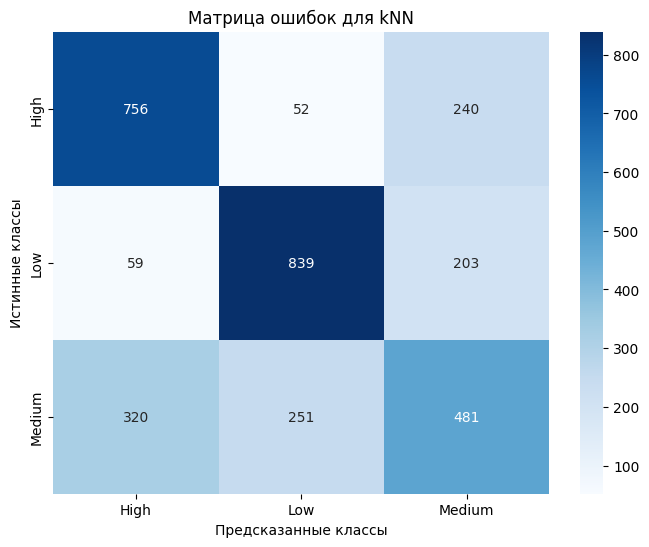

Классификационный отчет:
              precision    recall  f1-score   support

        High       0.67      0.72      0.69      1048
         Low       0.73      0.76      0.75      1101
      Medium       0.52      0.46      0.49      1052

    accuracy                           0.65      3201
   macro avg       0.64      0.65      0.64      3201
weighted avg       0.64      0.65      0.64      3201



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Признаки
X = data[['year', 'mileage', 'engineSize', 'mpg', 'tax']]  # Выберите числовые атрибуты

# Целевая переменная (ценовая категория)
y = data['price_category']

# Разделение на обучающую и тестовую выборки (30% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели kNN
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели
knn.fit(X_train, y_train)

# Прогнозирование на тестовых данных
knn_predictions = knn.predict(X_test)

# Прогнозы для первых 10 объектов тестовой выборки
print("Прогнозы для первых 10 объектов тестовой выборки:")
print(knn_predictions[:10])

# Оценка точности модели
accuracy = accuracy_score(y_test, knn_predictions)
print(f"Точность модели kNN: {accuracy:.2f}")

# Построение матрицы ошибок
cm = confusion_matrix(y_test, knn_predictions, labels=knn.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок для kNN')
plt.show()

# Классификационный отчет
print("Классификационный отчет:")
print(classification_report(y_test, knn_predictions))


Прогнозы для первых 10 объектов тестовой выборки (дерево решений):
['Low' 'Medium' 'High' 'High' 'Low' 'Medium' 'High' 'High' 'Low' 'Medium']
Точность модели дерева решений: 0.85


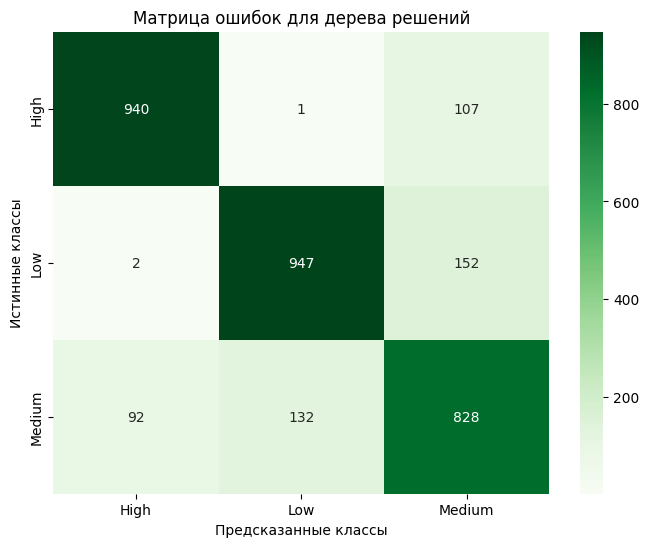

Классификационный отчет (дерево решений):
              precision    recall  f1-score   support

        High       0.91      0.90      0.90      1048
         Low       0.88      0.86      0.87      1101
      Medium       0.76      0.79      0.77      1052

    accuracy                           0.85      3201
   macro avg       0.85      0.85      0.85      3201
weighted avg       0.85      0.85      0.85      3201



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Создание модели дерева решений
dt = DecisionTreeClassifier(random_state=42)

# Обучение модели
dt.fit(X_train, y_train)

# Прогнозирование на тестовых данных
dt_predictions = dt.predict(X_test)

# Прогнозы для первых 10 объектов тестовой выборки
print("Прогнозы для первых 10 объектов тестовой выборки (дерево решений):")
print(dt_predictions[:10])

# Оценка точности модели
accuracy_dt = accuracy_score(y_test, dt_predictions)
print(f"Точность модели дерева решений: {accuracy_dt:.2f}")

# Построение матрицы ошибок
cm_dt = confusion_matrix(y_test, dt_predictions, labels=dt.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок для дерева решений')
plt.show()

# Классификационный отчет
print("Классификационный отчет (дерево решений):")
print(classification_report(y_test, dt_predictions))


In [50]:
from sklearn.metrics import accuracy_score

# Оценка точности для kNN
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Оценка точности для дерева решений
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Вывод точности моделей
print(f"kNN Accuracy: {knn_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


kNN Accuracy: 0.65
Decision Tree Accuracy: 0.85


In [40]:
from sklearn.metrics import classification_report

# Отчет по классификации для kNN
print("kNN Report:\n", classification_report(y_test, knn_predictions))

# Отчет по классификации для дерева решений
print("Decision Tree Report:\n", classification_report(y_test, dt_predictions))


kNN Report:
               precision    recall  f1-score   support

        High       0.67      0.72      0.69      1048
         Low       0.73      0.76      0.75      1101
      Medium       0.52      0.46      0.49      1052

    accuracy                           0.65      3201
   macro avg       0.64      0.65      0.64      3201
weighted avg       0.64      0.65      0.64      3201

Decision Tree Report:
               precision    recall  f1-score   support

        High       0.91      0.90      0.90      1048
         Low       0.88      0.86      0.87      1101
      Medium       0.76      0.79      0.77      1052

    accuracy                           0.85      3201
   macro avg       0.85      0.85      0.85      3201
weighted avg       0.85      0.85      0.85      3201



kNN ROC AUC Score: 0.33609664208563966
Decision Tree ROC AUC Score: 0.30718434588335525


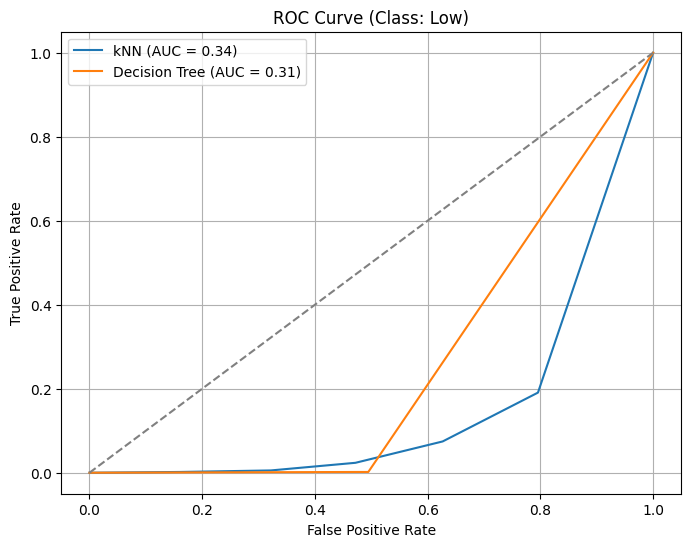

In [43]:
from sklearn.preprocessing import label_binarize

# Преобразование целевой переменной в формат для многоклассового ROC (бинаризация меток)
y_test_binarized = label_binarize(y_test, classes=['Low', 'Medium', 'High'])

# Преобразование предсказаний в вероятности для kNN
y_prob_knn = knn.predict_proba(X_test)

# Преобразование предсказаний в вероятности для дерева решений
y_prob_dt = dt.predict_proba(X_test)

# Выбираем только первую категорию ('Low') для построения ROC-кривой
fpr_knn, tpr_knn, _ = roc_curve(y_test_binarized[:, 0], y_prob_knn[:, 0])
fpr_dt, tpr_dt, _ = roc_curve(y_test_binarized[:, 0], y_prob_dt[:, 0])

# Вычисление ROC AUC для модели kNN и дерева решений
roc_auc_knn = roc_auc_score(y_test_binarized, y_prob_knn, multi_class='ovr')
roc_auc_dt = roc_auc_score(y_test_binarized, y_prob_dt, multi_class='ovr')

# Печать ROC AUC
print("kNN ROC AUC Score:", roc_auc_knn)
print("Decision Tree ROC AUC Score:", roc_auc_dt)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Class: Low)')
plt.legend(loc='best')
plt.grid()
plt.show()


Выводы

kNN:

Точность модели kNN составляет 0.65, что указывает на удовлетворительное качество модели, но с заметным снижением точности, особенно для класса Medium.
ROC AUC для kNN составляет 0.34, что также указывает на неэффективность модели в плане разделения классов.

Дерево решений:

Точность модели дерева решений составила 0.85, что значительно лучше, чем у kNN.
Дерево решений продемонстрировало более высокие результаты по метрикам Precision, Recall и F1-score, что делает его более подходящим для данной задачи.